##**Calculation and Prediction of Weather Quality**

**Importing libraries**

In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import warnings
import plotly.express as px
from re import S
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import folium
from folium.plugins import HeatMap
from folium import plugins
import geopandas as gpd
import folium
from sklearn.metrics import classification_report
from tabulate import tabulate
warnings.simplefilter('ignore')

**Data Preprocessing**



In [ ]:
df = pd.read_csv('IndianWeatherRepository.csv')
df.head()

country location_name          region  latitude  longitude      timezone  \
0   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1   India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2   India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3   India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4   India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693286100  2023-08-29 10:45                 27.5   
1          1693286100  2023-08-29 10:45                 27.5   
2          1693286100  2023-08-29 10:45                 26.3   
3          1693286100  2023-08-29 10:45                 25.6   
4          1693286100  2023-08-29 10:45                 27.2   

   temperature_fahrenheit  ... air_quality_PM2.5  air_quality_PM10  \
0                    81.5  ...              12.6              18.5   
1                    81.5  ...              10.7              14.2   
2                    79.3  ...              16.8              20.7   
3                    78.1  ...               4.9               6.6   
4                    81.0  ...              11.4              14.8   

   air_quality_us-epa-index  air_quality_gb-defra-index   sunrise    sunset  \
0                         1                           2  05:59 AM  06:41 PM   
1                         1                           1  06:00 AM  06:40 PM   
2                         2                           2  05:56 AM  06:34 PM   
3                         1                           1  06:00 AM  06:38 PM   
4                         1                           1  06:01 AM  06:39 PM   

   moonrise   moonset      moon_phase  moon_illumination  
0  05:42 PM  03:38 AM  Waxing Gibbous                 93  
1  05:39 PM  03:41 AM  Waxing Gibbous                 93  
2  05:32 PM  03:39 AM  Waxing Gibbous                 93  
3  05:36 PM  03:43 AM  Waxing Gibbous                 93  
4  05:38 PM  03:42 AM  Waxing Gibbous                 93  

[5 rows x 42 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       5463 non-null   object 
 1   location_name                 5463 non-null   object 
 2   region                        5463 non-null   object 
 3   latitude                      5463 non-null   float64
 4   longitude                     5463 non-null   float64
 5   timezone                      5463 non-null   object 
 6   last_updated_epoch            5463 non-null   int64  
 7   last_updated                  5463 non-null   object 
 8   temperature_celsius           5463 non-null   float64
 9   temperature_fahrenheit        5463 non-null   float64
 10  condition_text                5463 non-null   object 
 11  wind_mph                      5463 non-null   float64
 12  wind_kph                      5463 non-null   float64
 13  win

In [ ]:
df.describe().T

count          mean            std  \
latitude                      5463.0  2.310568e+01       5.799192   
longitude                     5463.0  8.022615e+01       5.757711   
last_updated_epoch            5463.0  1.693658e+09  242900.036000   
temperature_celsius           5463.0  2.570511e+01       4.022381   
temperature_fahrenheit        5463.0  7.826945e+01       7.240534   
wind_mph                      5463.0  5.559052e+00       3.224560   
wind_kph                      5463.0  8.948618e+00       5.184922   
wind_degree                   5463.0  2.096282e+02     100.440899   
pressure_mb                   5463.0  1.005783e+03       2.976551   
pressure_in                   5463.0  2.969950e+01       0.087716   
precip_mm                     5463.0  4.668497e-01       1.939223   
precip_in                     5463.0  1.824455e-02       0.076299   
humidity                      5463.0  7.564452e+01      14.189423   
cloud                         5463.0  3.991671e+01      31.212191   
feels_like_celsius            5463.0  2.798444e+01       4.982271   
feels_like_fahrenheit         5463.0  8.237090e+01       8.968097   
visibility_km                 5463.0  8.660150e+00       2.554728   
visibility_miles              5463.0  5.088047e+00       1.690467   
uv_index                      5463.0  2.852096e+00       2.750004   
gust_mph                      5463.0  9.012557e+00       4.853402   
gust_kph                      5463.0  1.450518e+01       7.811885   
air_quality_Carbon_Monoxide   5463.0  5.103656e+02     403.396562   
air_quality_Ozone             5463.0  3.097996e+01      24.904857   
air_quality_Nitrogen_dioxide  5463.0  7.496211e+00       7.777211   
air_quality_Sulphur_dioxide   5463.0  4.661322e+00      13.890783   
air_quality_PM2.5             5463.0  4.211523e+01      45.595172   
air_quality_PM10              5463.0  5.420760e+01      54.741536   
air_quality_us-epa-index      5463.0  2.261395e+00       1.208623   
air_quality_gb-defra-index    5463.0  4.178290e+00       3.368885   
moon_illumination             5463.0  8.791488e+01      13.092168   

                                       min           25%           50%  \
latitude                      8.080000e+00  2.027000e+01  2.397000e+01   
longitude                     6.897000e+01  7.607000e+01  7.867000e+01   
last_updated_epoch            1.693286e+09  1.693439e+09  1.693613e+09   
temperature_celsius          -2.600000e+00  2.410000e+01  2.610000e+01   
temperature_fahrenheit        2.730000e+01  7.540000e+01  7.900000e+01   
wind_mph                      2.200000e+00  3.100000e+00  4.700000e+00   
wind_kph                      3.600000e+00  5.000000e+00  7.600000e+00   
wind_degree                   1.000000e+00  1.130000e+02  2.500000e+02   
pressure_mb                   9.990000e+02  1.004000e+03  1.005000e+03   
pressure_in                   2.950000e+01  2.964000e+01  2.969000e+01   
precip_mm                     0.000000e+00  0.000000e+00  0.000000e+00   
precip_in                     0.000000e+00  0.000000e+00  0.000000e+00   
humidity                      2.200000e+01  6.600000e+01  7.600000e+01   
cloud                         0.000000e+00  1.100000e+01  3.000000e+01   
feels_like_celsius           -2.600000e+00  2.615000e+01  2.840000e+01   
feels_like_fahrenheit         2.730000e+01  7.905000e+01  8.310000e+01   
visibility_km                 0.000000e+00  9.000000e+00  1.000000e+01   
visibility_miles              0.000000e+00  5.000000e+00  6.000000e+00   
uv_index                      1.000000e+00  1.000000e+00  1.000000e+00   
gust_mph                      0.000000e+00  5.400000e+00  8.500000e+00   
gust_kph                      0.000000e+00  8.600000e+00  1.370000e+01   
air_quality_Carbon_Monoxide   1.252000e+02  2.503000e+02  3.605000e+02   
air_quality_Ozone             0.000000e+00  1.180000e+01  2.650000e+01   
air_quality_Nitrogen_dioxide  0.000000e+00  2.600000e+00  4.800000e+00   
air_quality_Sulphur_dioxide   0.000000e+0

In [ ]:
df.median()

latitude                        2.397000e+01
longitude                       7.867000e+01
last_updated_epoch              1.693613e+09
temperature_celsius             2.610000e+01
temperature_fahrenheit          7.900000e+01
wind_mph                        4.700000e+00
wind_kph                        7.600000e+00
wind_degree                     2.500000e+02
pressure_mb                     1.005000e+03
pressure_in                     2.969000e+01
precip_mm                       0.000000e+00
precip_in                       0.000000e+00
humidity                        7.600000e+01
cloud                           3.000000e+01
feels_like_celsius              2.840000e+01
feels_like_fahrenheit           8.310000e+01
visibility_km                   1.000000e+01
visibility_miles                6.000000e+00
uv_index                        1.000000e+00
gust_mph                        8.500000e+00
gust_kph                        1.370000e+01
air_quality_Carbon_Monoxide     3.605000e+02
air_qualit

In [ ]:
df.skew()

latitude                        -0.582002
longitude                        0.839574
last_updated_epoch               0.040179
temperature_celsius             -1.727586
temperature_fahrenheit          -1.726724
wind_mph                         1.353196
wind_kph                         1.361056
wind_degree                     -0.657330
pressure_mb                      0.656111
pressure_in                      0.644382
precip_mm                       11.737682
precip_in                       11.716681
humidity                        -0.363506
cloud                            0.367730
feels_like_celsius              -1.411677
feels_like_fahrenheit           -1.412120
visibility_km                   -1.720414
visibility_miles                -1.654124
uv_index                         0.891190
gust_mph                         0.973851
gust_kph                         0.972715
air_quality_Carbon_Monoxide      3.315251
air_quality_Ozone                1.190723
air_quality_Nitrogen_dioxide     2

In [ ]:
df.isnull().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

In [ ]:
df.shape

(5463, 42)

**Exploratory Data Analysis**

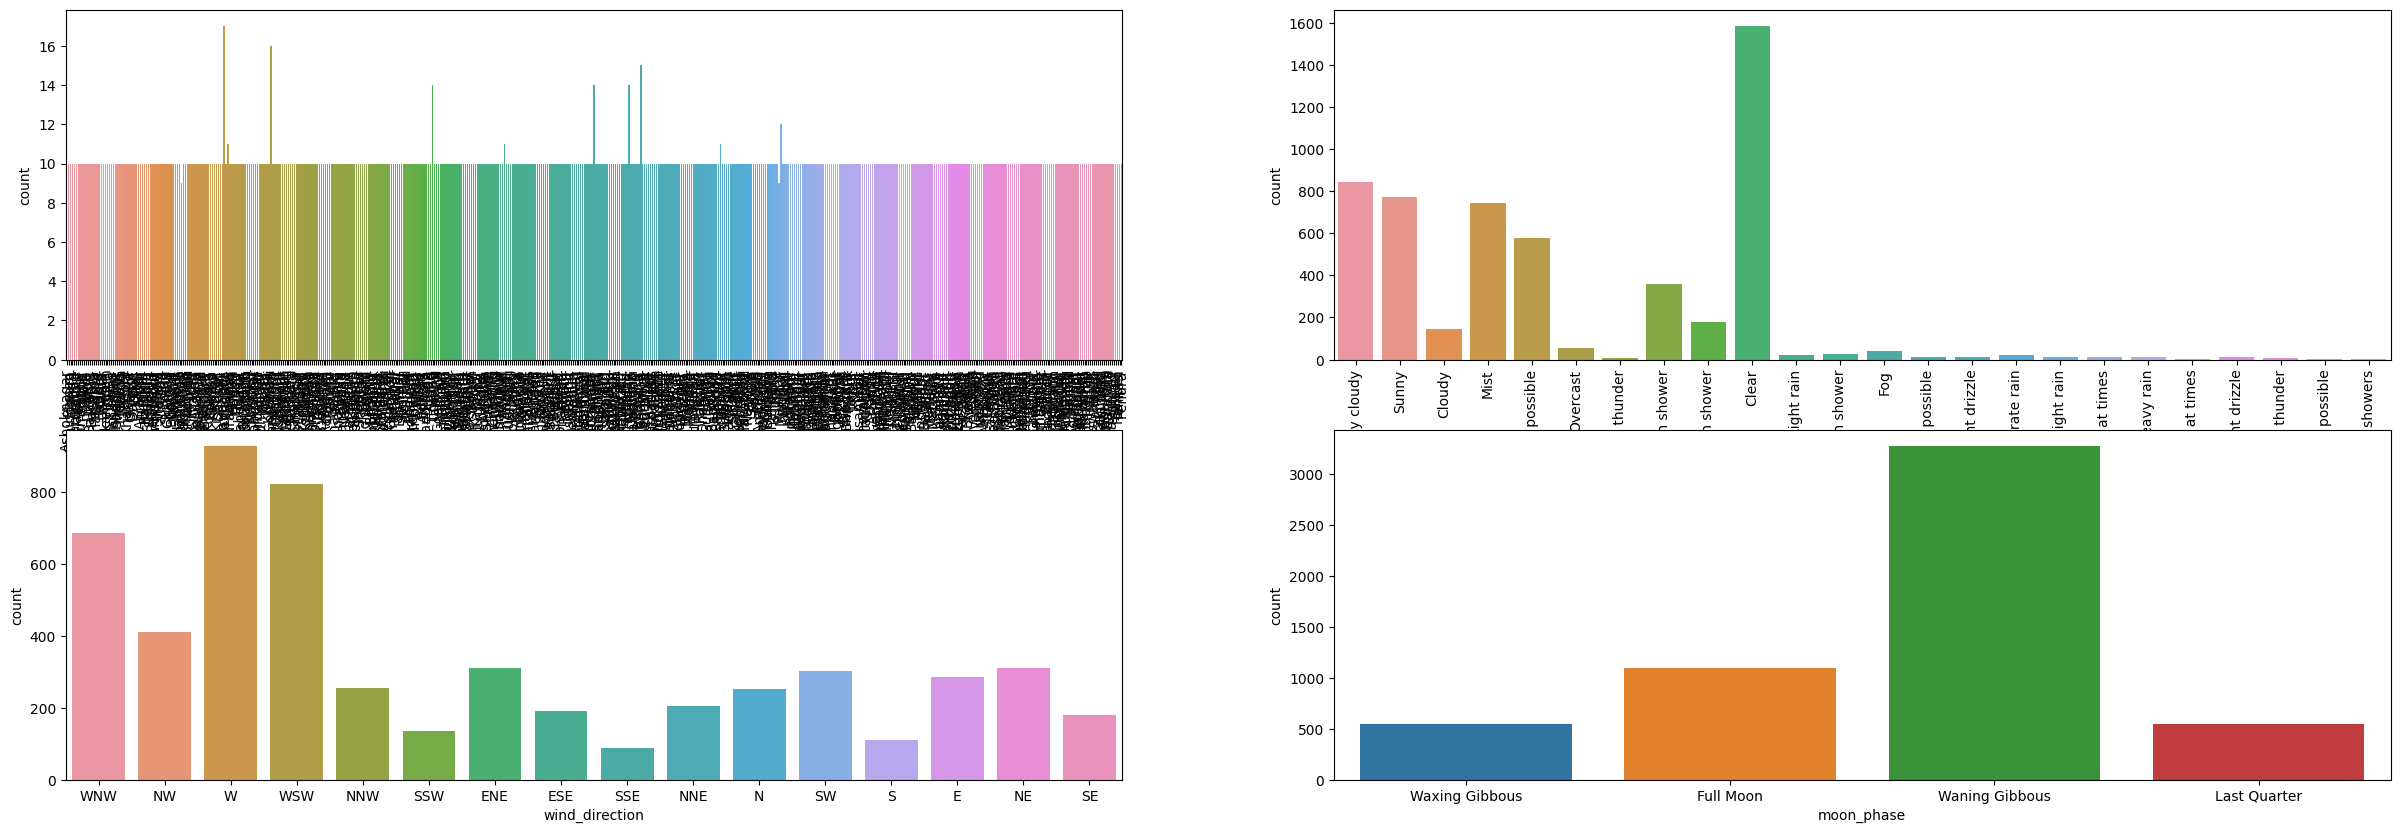

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sns.countplot(data=df, x="location_name",ax=ax[0,0])
ax[0, 0].tick_params(axis='x', rotation=90)
sns.countplot(data=df, x="condition_text",ax=ax[0,1])
ax[0, 1].tick_params(axis='x', rotation=90)
sns.countplot(data=df, x="wind_direction",ax=ax[1,0])
sns.countplot(data=df, x="moon_phase",ax=ax[1,1])

plt.show()

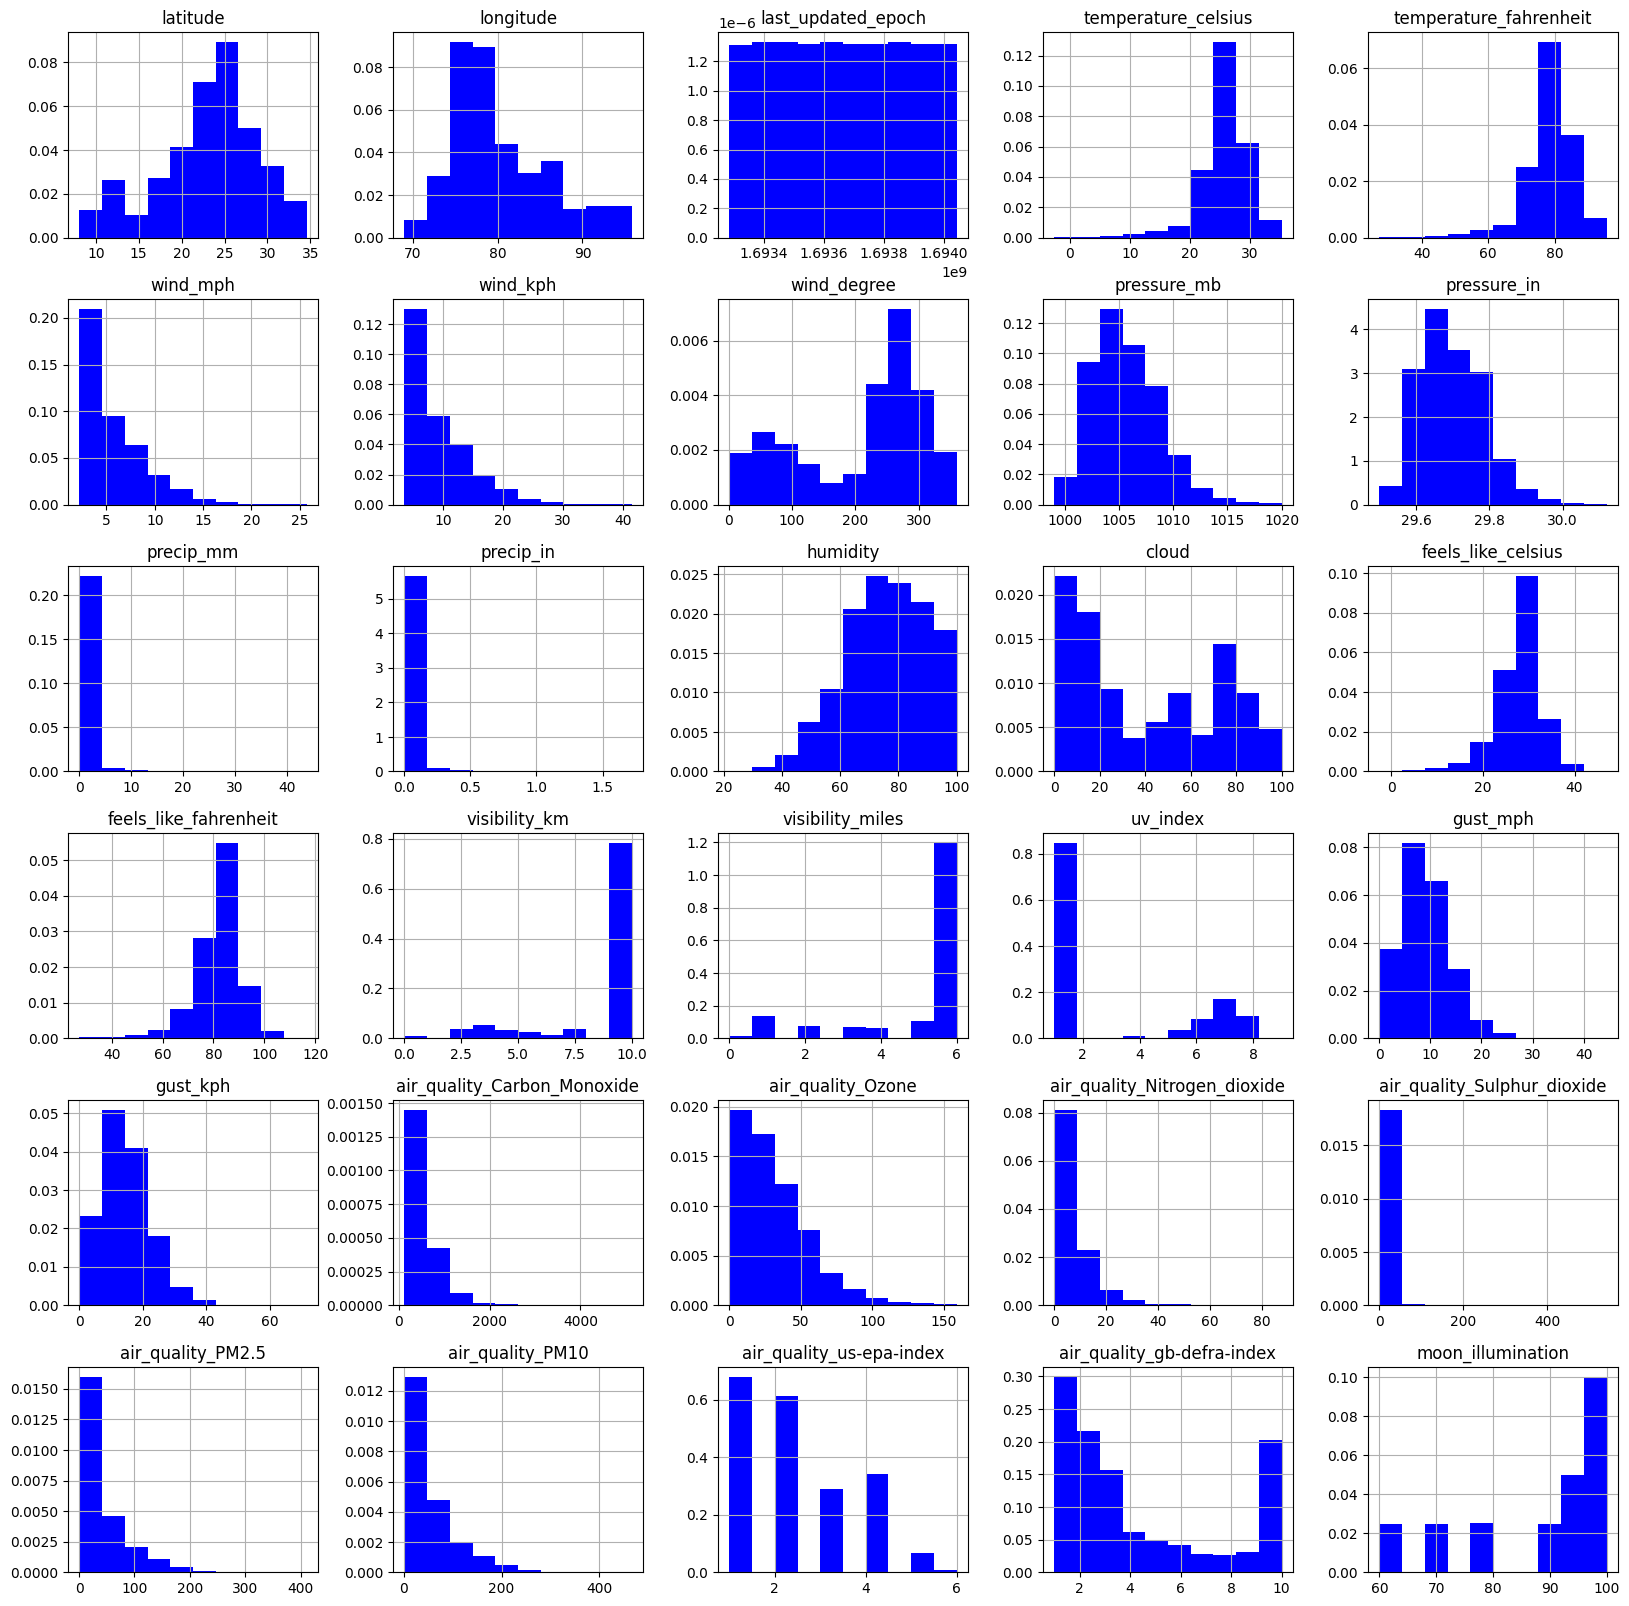

In [ ]:
df.hist(figsize=(20, 20),color='blue', density=True)
plt.show()

In [ ]:
def update_heatmap(selected_column):
    s = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)
    heat_data = [[row['latitude'], row['longitude'], row[selected_column]] for index, row in df.iterrows()]
    HeatMap(heat_data, radius=12).add_to(s)
    display(s)

column_selector = widgets.Dropdown(
    options=df.describe().columns,
    description='Columna:',
)

interact(update_heatmap, selected_column=column_selector)

interactive(children=(Dropdown(description='Columna:', options=('latitude', 'longitude', 'last_updated_epoch',…

<function __main__.update_heatmap(selected_column)>

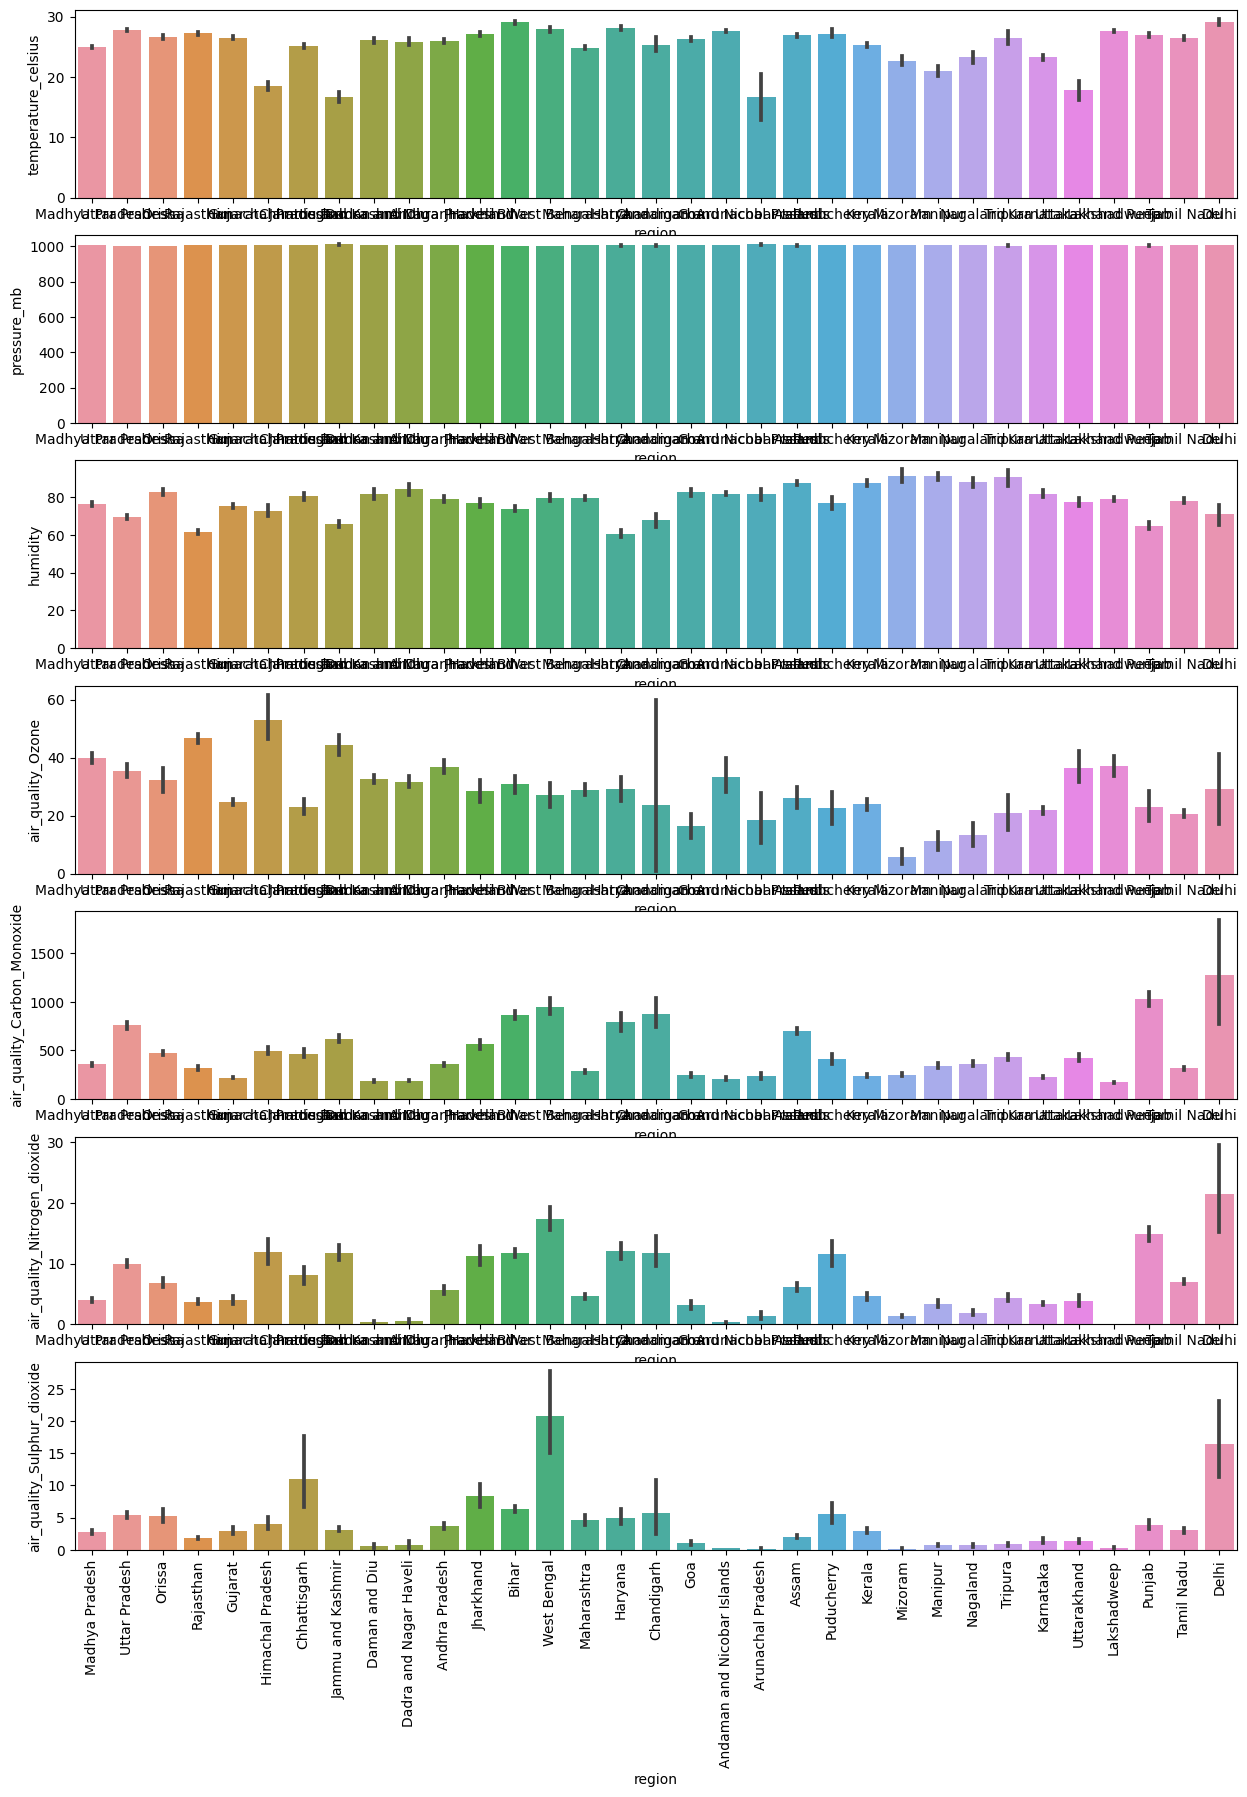

In [ ]:
fig, ax = plt.subplots(7, 1, figsize=(15, 20))

sns.barplot(data = df, x='region', y='temperature_celsius', ax = ax[0])
sns.barplot(data = df, x='region', y='pressure_mb', ax = ax[1])
sns.barplot(data = df, x='region', y='humidity', ax = ax[2])
sns.barplot(data = df, x='region', y='air_quality_Ozone', ax = ax[3])
sns.barplot(data = df, x='region', y='air_quality_Carbon_Monoxide', ax = ax[4])
sns.barplot(data = df, x='region', y='air_quality_Nitrogen_dioxide', ax = ax[5])
sns.barplot(data = df, x='region', y='air_quality_Sulphur_dioxide', ax = ax[6])

plt.xticks(rotation=90)
plt.show()


**Selection of Main Contamination Features**

In [ ]:
df_new = df[['latitude','longitude', 'region','condition_text','wind_kph','temperature_celsius', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'precip_mm', 'humidity']]

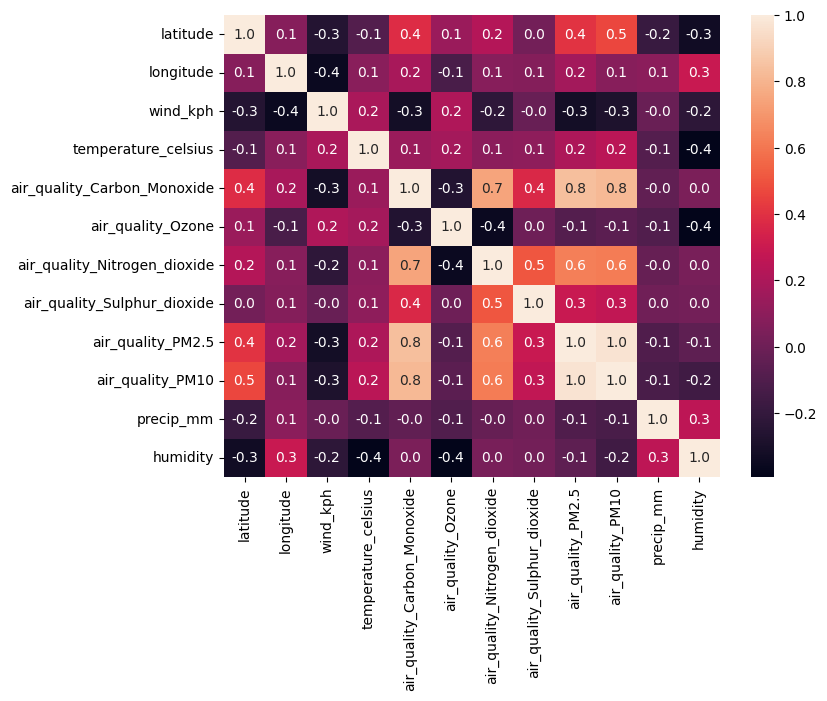

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_new.corr(), annot = True, fmt = '.1f')
plt.show()

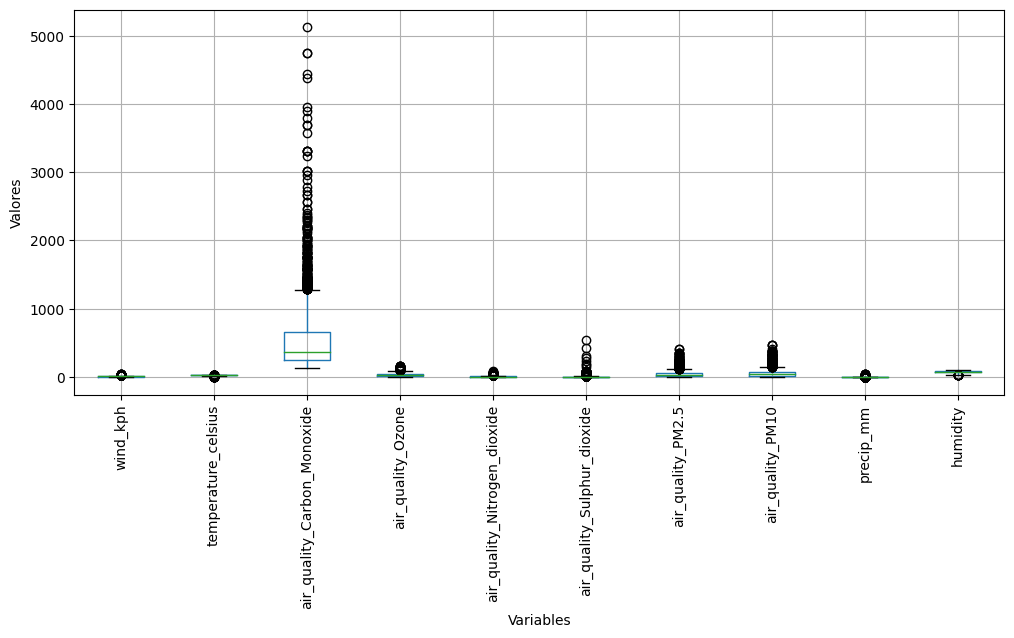

In [ ]:
columnas_boxplot = ['wind_kph','temperature_celsius', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'precip_mm', 'humidity']

plt.figure(figsize=(12, 5))
df_new[columnas_boxplot].boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=90)
plt.show()

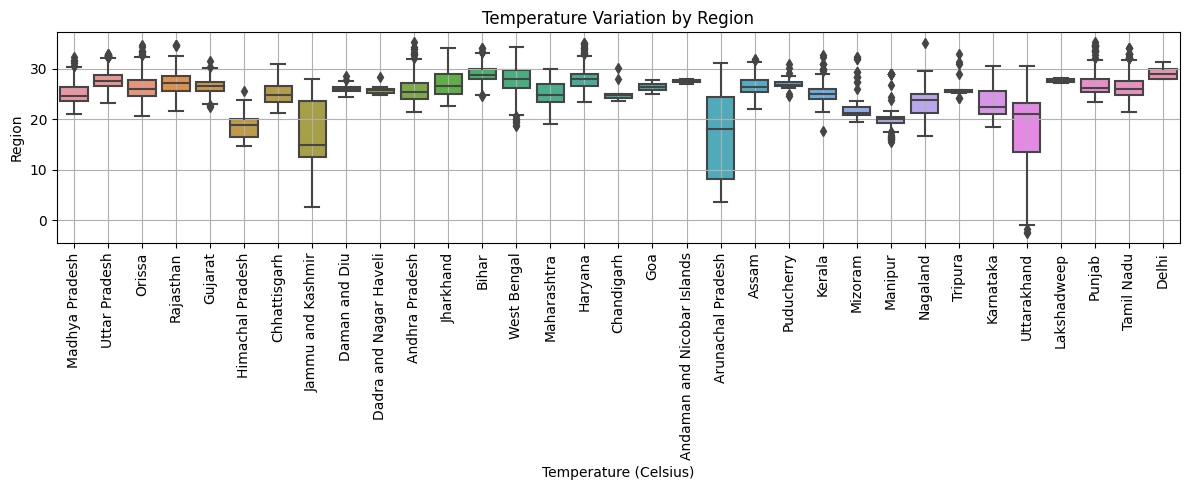

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_new, x='region', y='temperature_celsius')
plt.title('Temperature Variation by Region')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

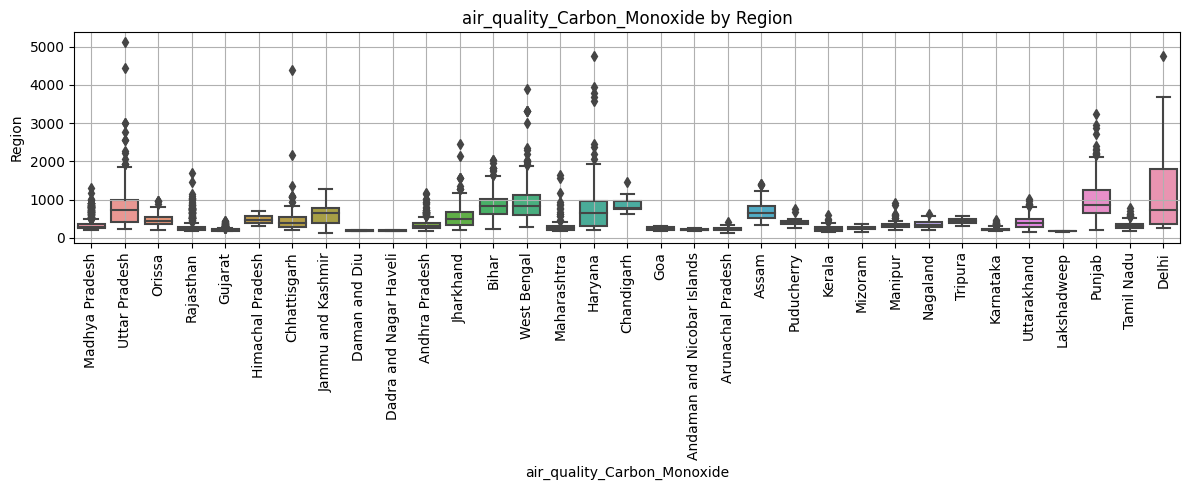

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_new, x='region', y='air_quality_Carbon_Monoxide')
plt.title('air_quality_Carbon_Monoxide by Region')
plt.xlabel('air_quality_Carbon_Monoxide')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

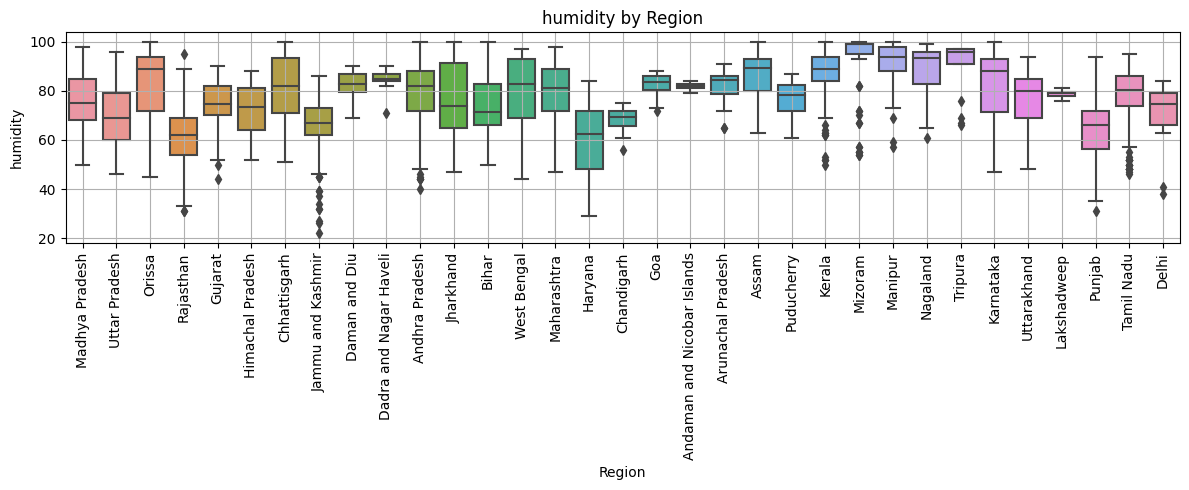

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_new, x='region', y='humidity')
plt.title('humidity by Region')
plt.xlabel('Region')
plt.ylabel('humidity')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

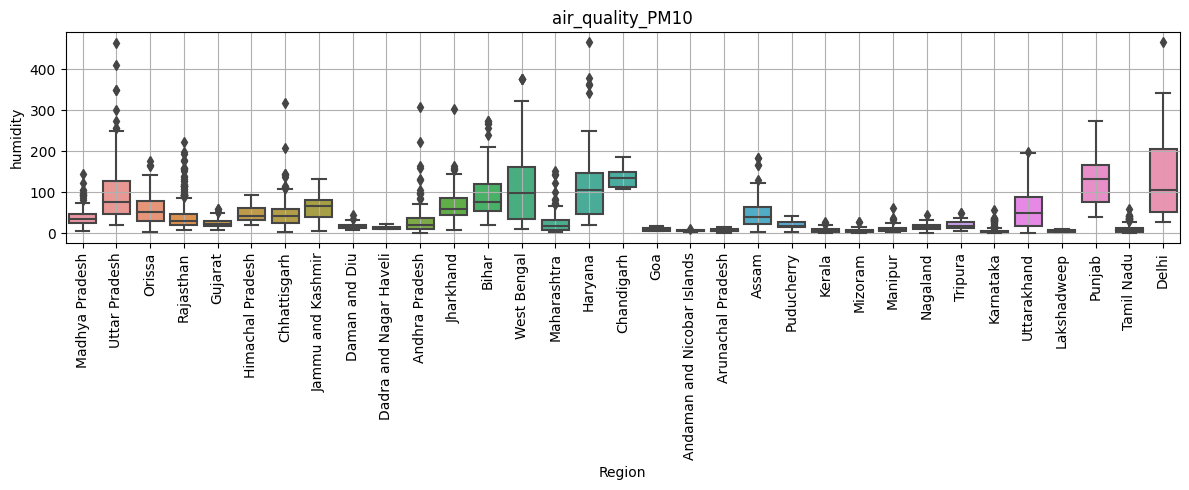

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_new, x='region', y='air_quality_PM10')
plt.title('air_quality_PM10')
plt.xlabel('Region')
plt.ylabel('humidity')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

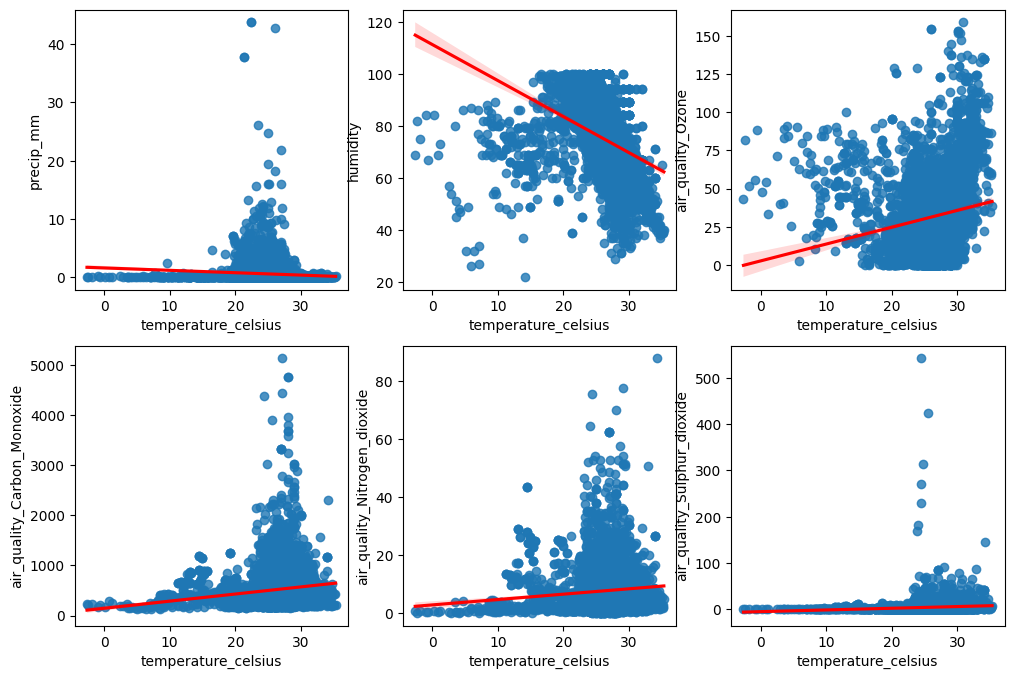

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

sns.regplot(x = "temperature_celsius", y = "precip_mm", data = df, line_kws = {"color": "red"},ax = ax[0,0])
sns.regplot(data = df_new, x='temperature_celsius', y='humidity', line_kws = {"color": "red"},ax = ax[0,1])
sns.regplot(data = df_new, x='temperature_celsius', y='air_quality_Ozone', line_kws = {"color": "red"},ax = ax[0,2])
sns.regplot(data = df_new, x='temperature_celsius', y='air_quality_Carbon_Monoxide', line_kws = {"color": "red"},ax = ax[1,0])
sns.regplot(data = df_new, x='temperature_celsius', y='air_quality_Nitrogen_dioxide', line_kws = {"color": "red"},ax = ax[1,1])
sns.regplot(data = df_new, x='temperature_celsius', y='air_quality_Sulphur_dioxide', line_kws = {"color": "red"},ax = ax[1,2])

plt.show()

**Determinate Contaminants**

In [ ]:
Contaminants = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']

cals = [0.1, 0.1, 0.1, 0.1, 0.2, 0.4]

for i, contaminant in enumerate(Contaminants):
    df_new[f'Sub-ICA_{contaminant}'] = df_new[contaminant] * cals[i]
df_new['ICA'] = df_new[[f'Sub-ICA_{contaminant}' for contaminant in Contaminants]].sum(axis=1)

def clasificar_ICA(ica):
    if 0 <= ica < 50:
        return 'Good'
    elif 50 <= ica < 100:
        return 'Moderate'
    elif 100 <= ica < 150:
        return 'Not healthy for sensitive groups'
    elif 150 <= ica < 200:
        return 'not healthy'
    elif 200 <= ica < 300:
        return 'unhealthy'
    else:
        return 'dangerous'

df_new['Air_quality'] = df_new['ICA'].apply(clasificar_ICA)

df_new.head(1)


latitude  longitude          region condition_text  wind_kph  \
0     24.57      77.72  Madhya Pradesh  Partly cloudy      20.5   

   temperature_celsius  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                 27.5                        243.7               45.8   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  ...  precip_mm  \
0                           1.7                          3.1  ...        0.0   

   humidity  Sub-ICA_air_quality_Carbon_Monoxide  Sub-ICA_air_quality_Ozone  \
0        67                                24.37                       4.58   

   Sub-ICA_air_quality_Nitrogen_dioxide  Sub-ICA_air_quality_Sulphur_dioxide  \
0                                  0.17                                 0.31   

   Sub-ICA_air_quality_PM2.5  Sub-ICA_air_quality_PM10    ICA  Air_quality  
0                       2.52                       7.4  39.35         Good  

[1 rows x 22 columns]

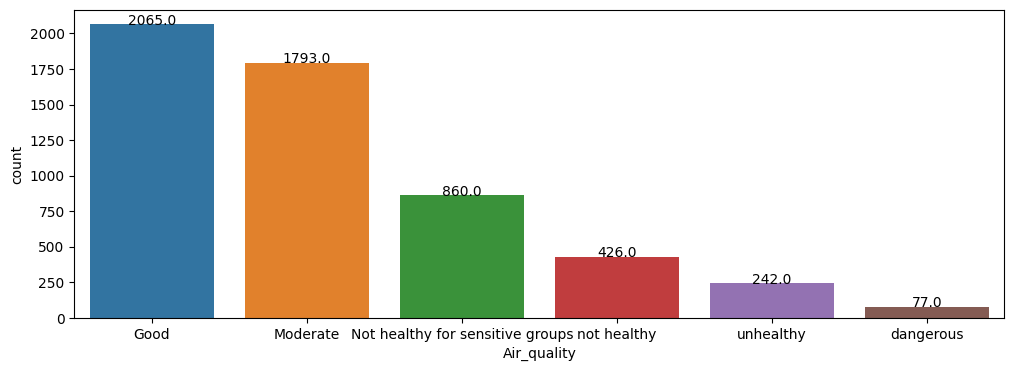

In [ ]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df_new, x="Air_quality")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')
plt.show()

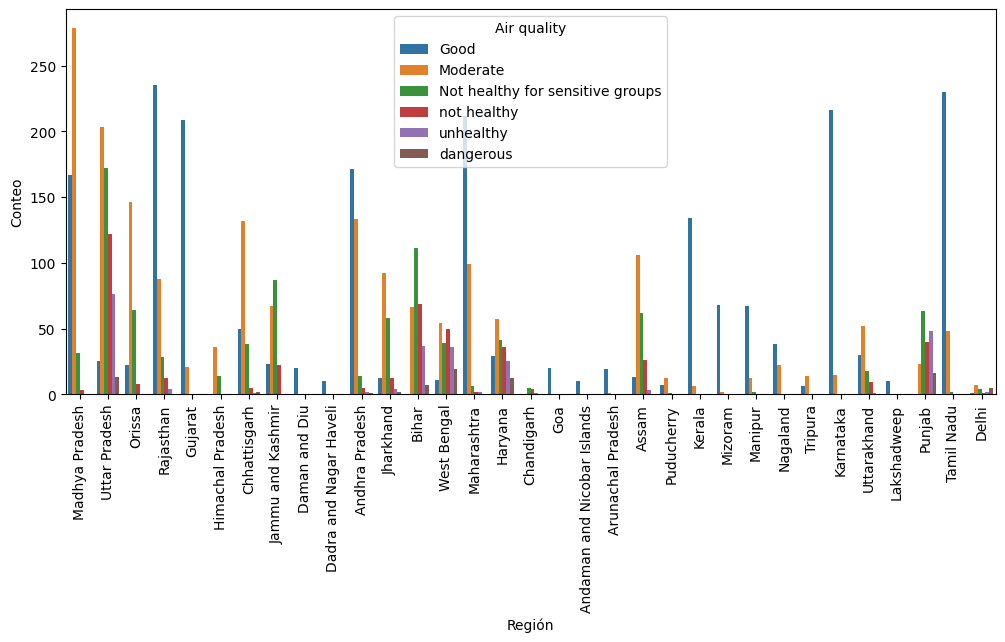

In [ ]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df_new, x="region", hue="Air_quality")

plt.xlabel('Región')
plt.ylabel('Conteo')
plt.legend(title='Air quality')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
mapeo = {
    'Good': 1,
    'Moderate': 2,
    'Not healthy for sensitive groups': 3,
    'not healthy': 4,
    'unhealthy': 5,
    'dangerous': 6
}

df_new['Air_quality'] = df_new['Air_quality'].replace(mapeo)
df_new.head(1)

latitude  longitude          region condition_text  wind_kph  \
0     24.57      77.72  Madhya Pradesh  Partly cloudy      20.5   

   temperature_celsius  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                 27.5                        243.7               45.8   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  ...  precip_mm  \
0                           1.7                          3.1  ...        0.0   

   humidity  Sub-ICA_air_quality_Carbon_Monoxide  Sub-ICA_air_quality_Ozone  \
0        67                                24.37                       4.58   

   Sub-ICA_air_quality_Nitrogen_dioxide  Sub-ICA_air_quality_Sulphur_dioxide  \
0                                  0.17                                 0.31   

   Sub-ICA_air_quality_PM2.5  Sub-ICA_air_quality_PM10    ICA  Air_quality  
0                       2.52                       7.4  39.35            1  

[1 rows x 22 columns]

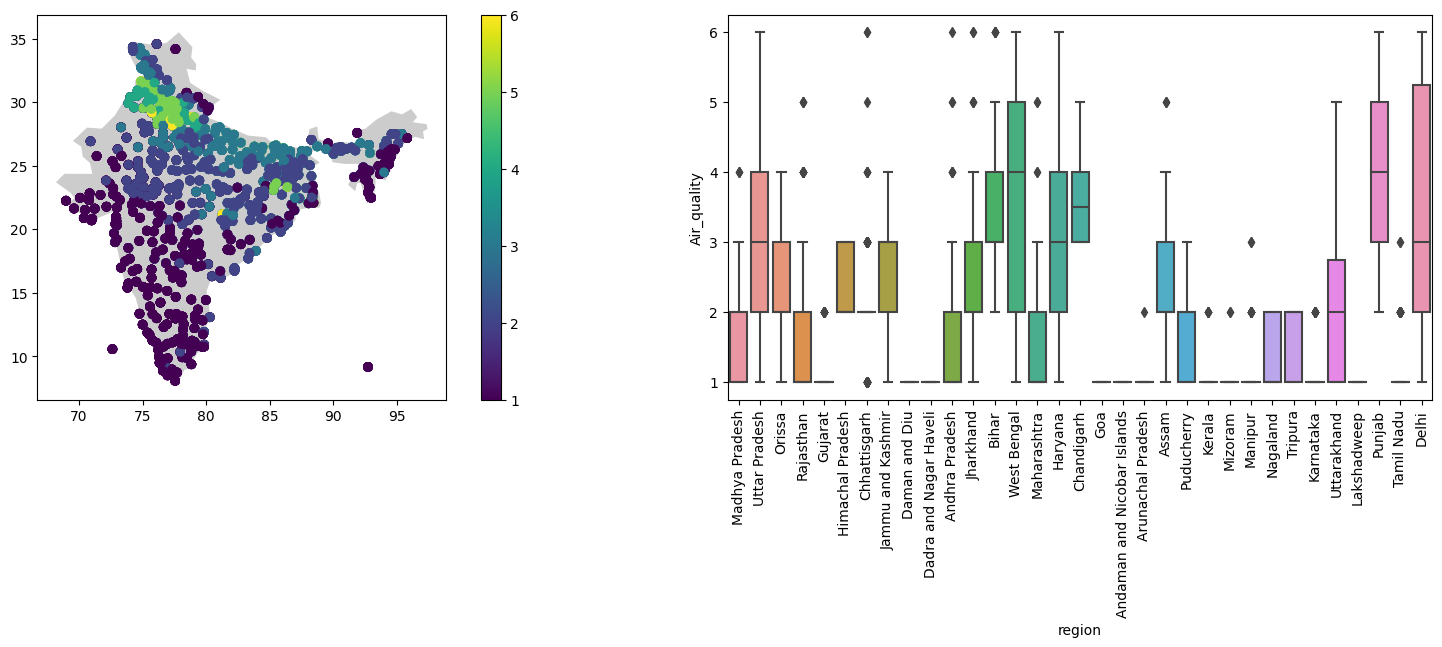

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry = gpd.points_from_xy(df_new.longitude, df_new.latitude)
geo_df = gpd.GeoDataFrame(df_new[["latitude", "longitude", "Air_quality"]], geometry=geometry)
geo_df.head()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df_new, x='region', y='Air_quality', ax = ax[1])
world[world['name'] == 'India'].plot(ax=ax[0], alpha=0.4, color="grey")
geo_df.plot(column="Air_quality", ax=ax[0], legend=True, cmap="viridis")
plt.xticks(rotation=90)

plt.show()

In [ ]:
m = folium.Map(location=[df_new['latitude'].mean(), df_new['longitude'].mean()], zoom_start=5)

heat_data = [[row['latitude'], row['longitude'], row['Air_quality']] for index, row in df_new.iterrows()]

HeatMap(heat_data, radius=12).add_to(m)

m.save('Air_quality_heatmap.html')
m

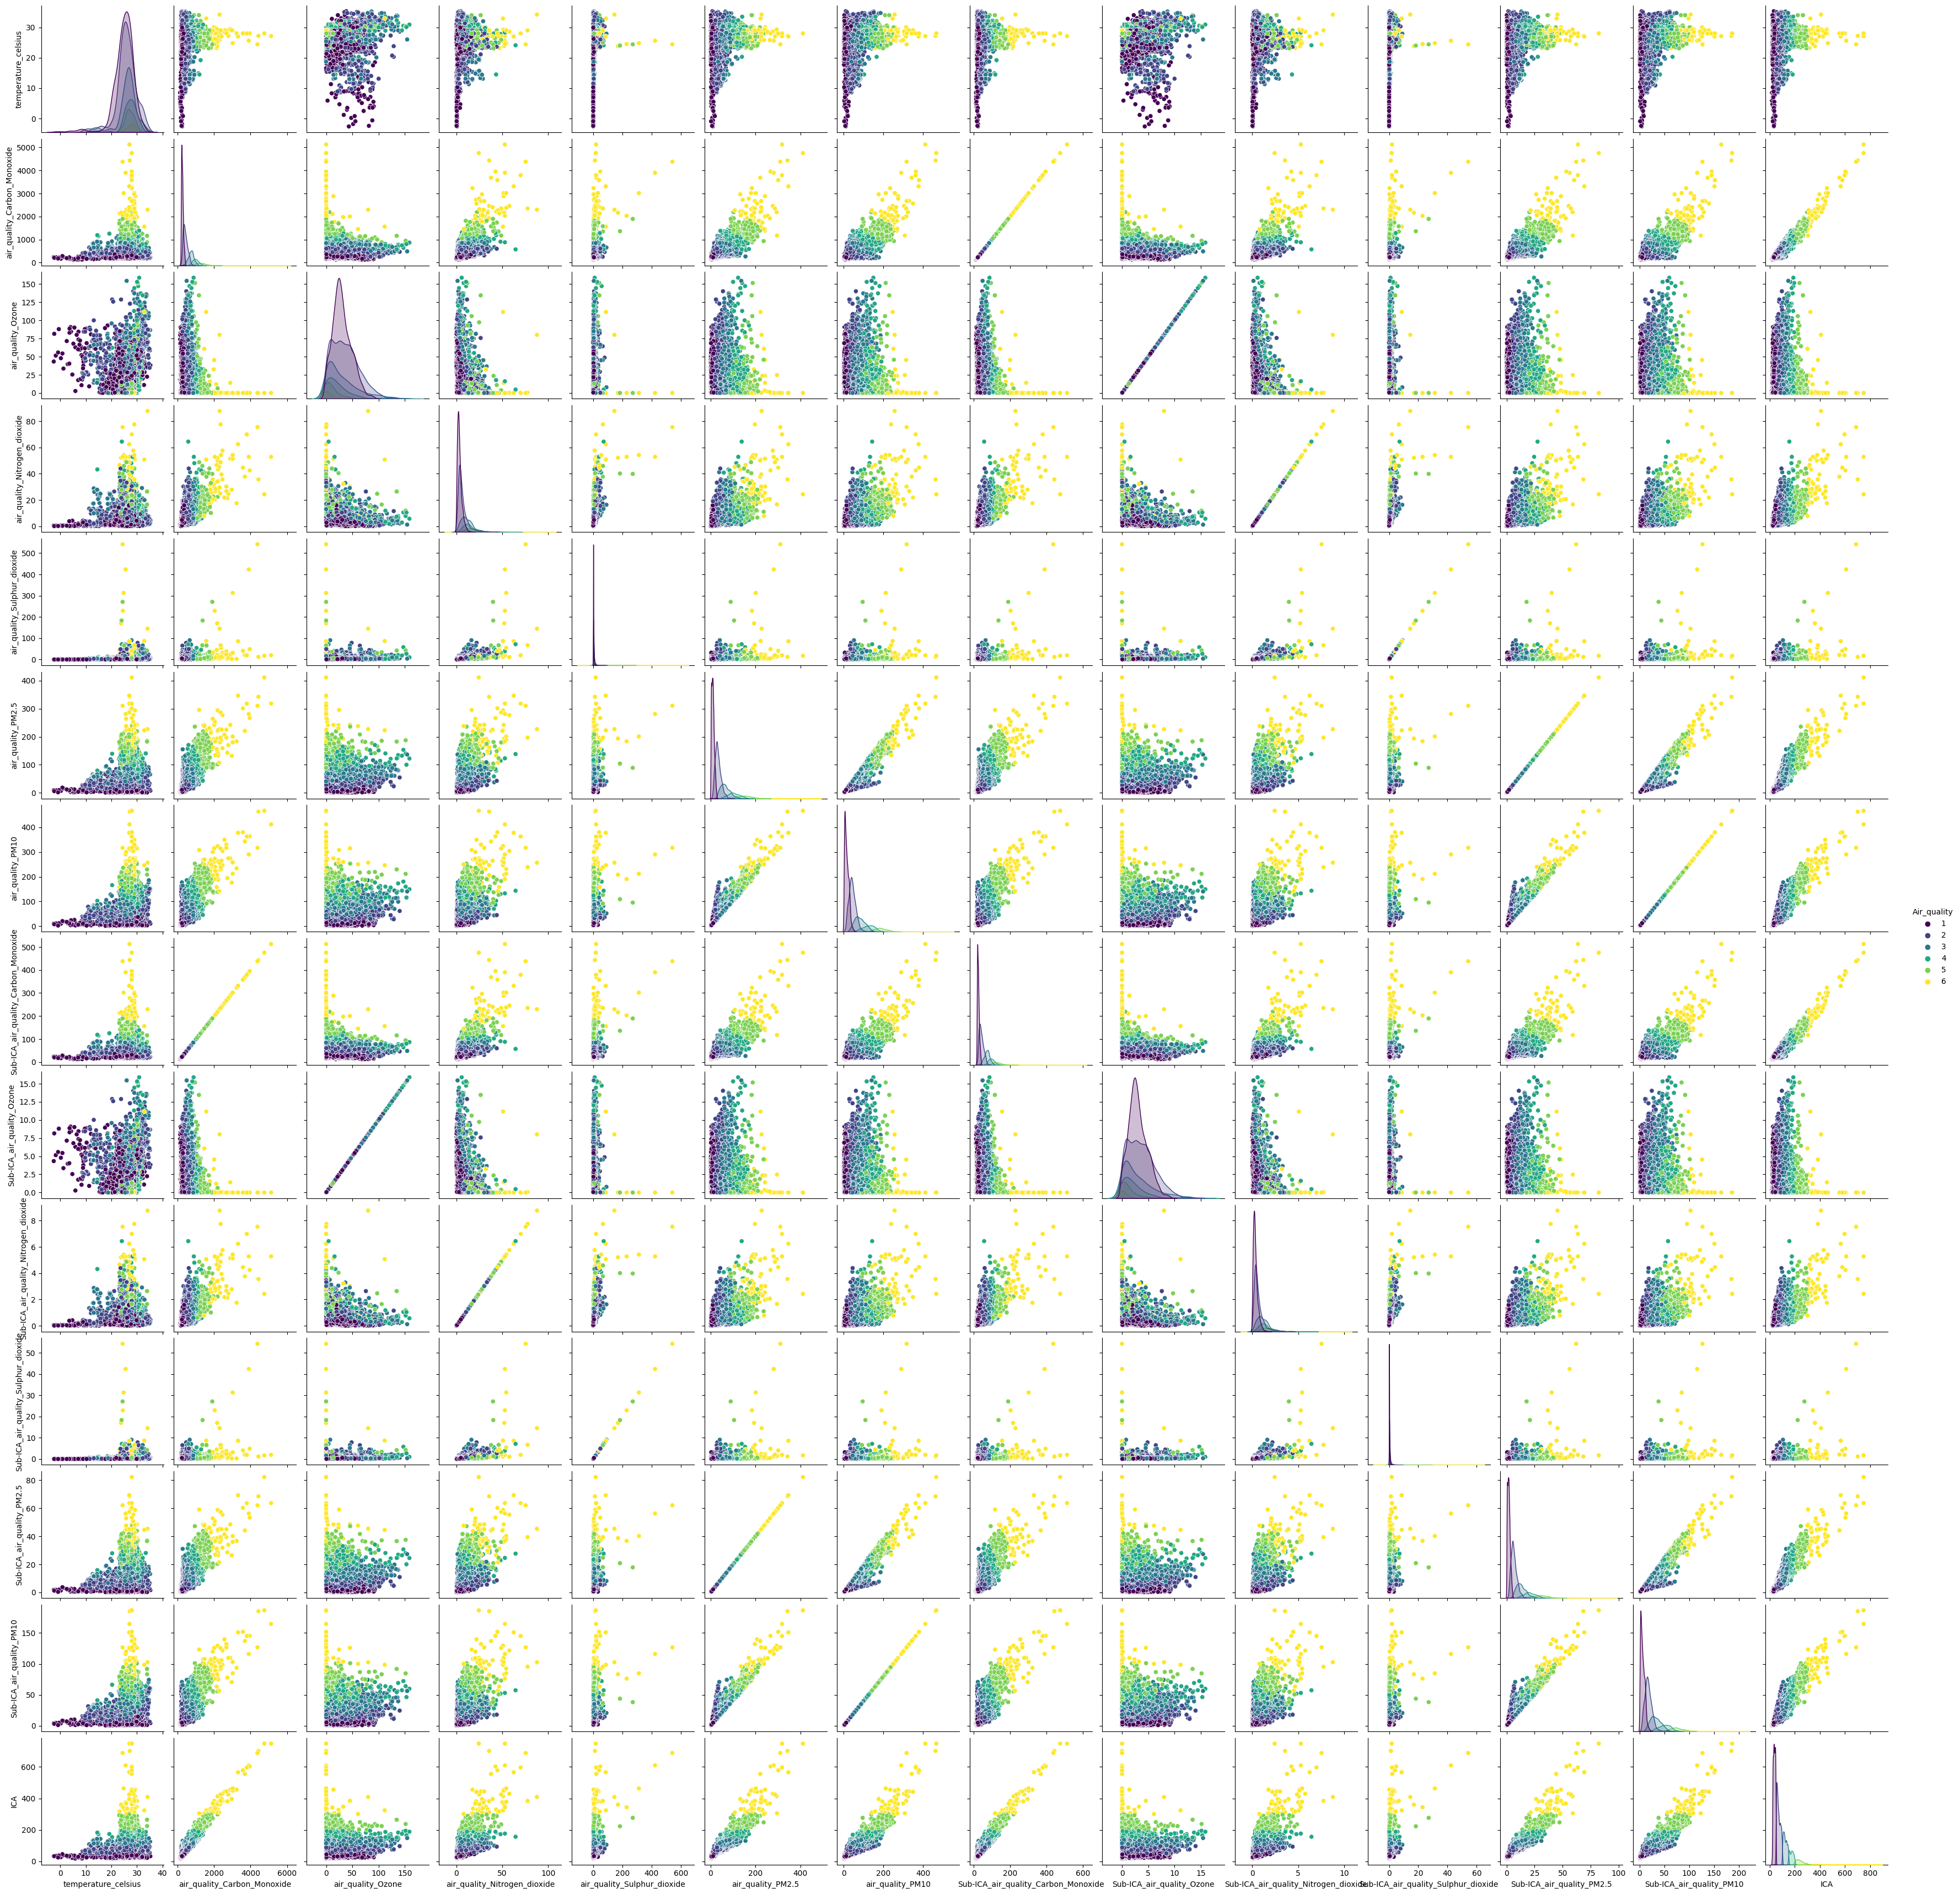

In [ ]:
df_new_p = df_new[['region', 'condition_text',
       'temperature_celsius', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
        'Sub-ICA_air_quality_Carbon_Monoxide',
       'Sub-ICA_air_quality_Ozone', 'Sub-ICA_air_quality_Nitrogen_dioxide',
       'Sub-ICA_air_quality_Sulphur_dioxide', 'Sub-ICA_air_quality_PM2.5',
       'Sub-ICA_air_quality_PM10', 'ICA', 'Air_quality']]
sns.pairplot(data = df_new_p, hue = 'Air_quality', palette = 'viridis')

In [186]:
vars = df_new[df_new['Air_quality'] >= 5].groupby('region')['Air_quality'].value_counts()

print(f'These regions of India have a deficit in air quality for living beings, their ICA score based on the calculation of \nthis report is equal to or greater than 4 are: \n{vars}')

These regions of India have a deficit in air quality for living beings, their ICA score based on the calculation of 
this report is equal to or greater than 4 are: 
region          Air_quality
Andhra Pradesh  5               2
                6               1
Assam           5               3
Bihar           5              37
                6               7
Chandigarh      5               1
Chhattisgarh    6               2
                5               1
Delhi           6               5
                5               2
Haryana         5              25
                6              12
Jharkhand       5               4
                6               2
Maharashtra     5               2
Punjab          5              48
                6              16
Rajasthan       5               4
Uttar Pradesh   5              76
                6              13
Uttarakhand     5               1
West Bengal     5              36
                6              19
Name: Air_quality, dtype:

**Modeling and Evaluation**

In [ ]:
X = df_new[df_new.describe().columns.to_list()]
X = X.iloc[:, :-1]
Y = df_new['Air_quality']

scaler = StandardScaler()
x = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [192]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred))
print("accuracy: ",accuracy_score(y_test, model_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred))


              precision    recall  f1-score   support

           1       0.98      0.98      0.98       618
           2       0.98      0.96      0.97       529
           3       0.96      0.99      0.97       270
           4       0.94      0.98      0.96       122
           5       0.97      0.91      0.94        77
           6       0.96      0.96      0.96        23

    accuracy                           0.97      1639
   macro avg       0.96      0.96      0.96      1639
weighted avg       0.97      0.97      0.97      1639

accuracy:  0.9725442342892008
mean_absolute_error:  0.027455765710799267
mean_squared_error:  0.027455765710799267


In [193]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred))
print("accuracy: ",accuracy_score(y_test, model_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       618
           2       1.00      1.00      1.00       529
           3       1.00      1.00      1.00       270
           4       0.97      0.99      0.98       122
           5       1.00      0.94      0.97        77
           6       0.96      1.00      0.98        23

    accuracy                           1.00      1639
   macro avg       0.99      0.99      0.99      1639
weighted avg       1.00      1.00      1.00      1639

accuracy:  0.99633923123856
mean_absolute_error:  0.0036607687614399025
mean_squared_error:  0.0036607687614399025


In [194]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred))
print("accuracy: ",accuracy_score(y_test, model_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       618
           2       1.00      1.00      1.00       529
           3       1.00      1.00      1.00       270
           4       0.97      1.00      0.98       122
           5       1.00      0.95      0.97        77
           6       1.00      1.00      1.00        23

    accuracy                           1.00      1639
   macro avg       0.99      0.99      0.99      1639
weighted avg       1.00      1.00      1.00      1639

accuracy:  0.9975594874923734
mean_absolute_error:  0.0024405125076266015
mean_squared_error:  0.0024405125076266015


In [195]:
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)

In [196]:
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

print("Accuracy Regresión Logística:", logistic_accuracy)
print("Accuracy Random Forest:", random_forest_accuracy)
print("Accuracy Decision Tree:", decision_tree_accuracy)

Accuracy Regresión Logística: 0.9725442342892008
Accuracy Random Forest: 0.99633923123856
Accuracy Decision Tree: 0.9975594874923734


1    619.5
2    537.9
3    258.0
4    127.8
5     72.6
6     23.1
Name: Air_quality, dtype: float64


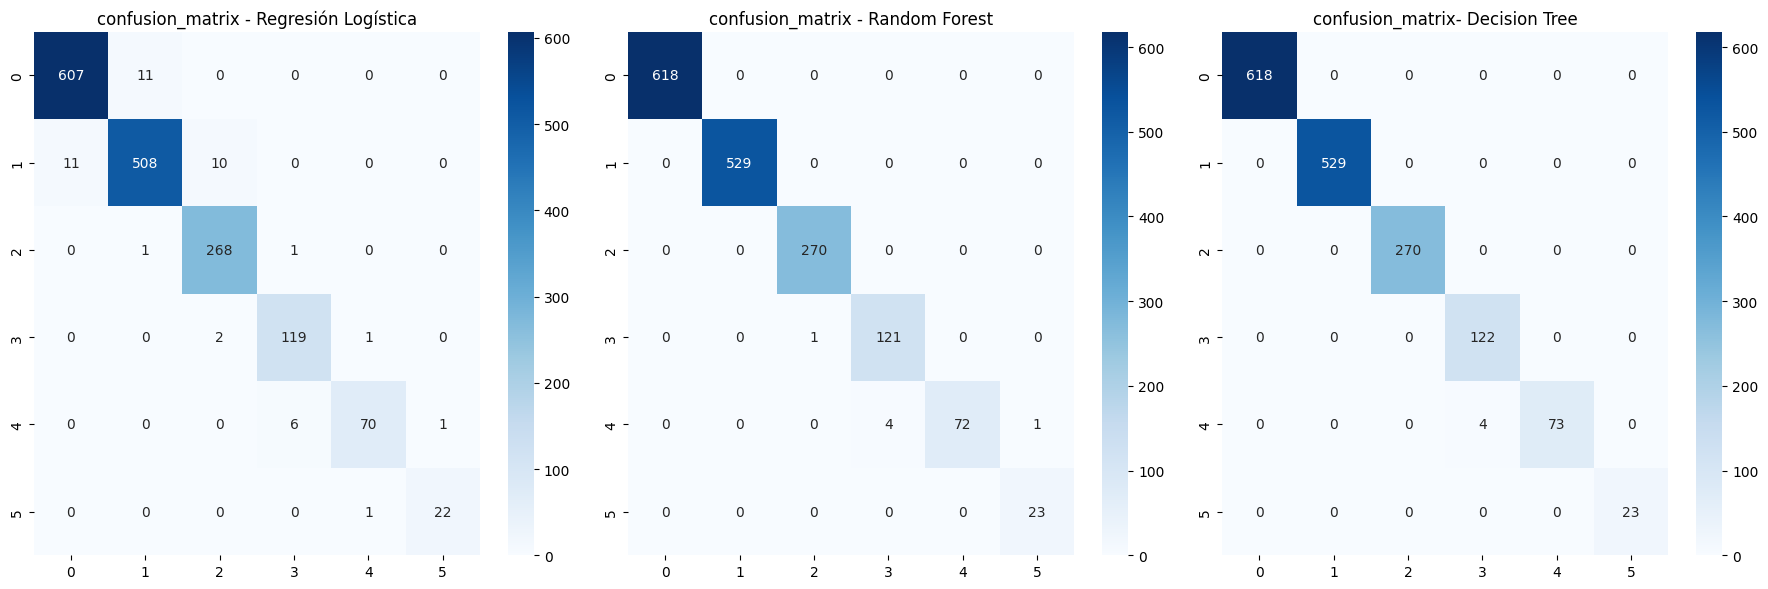

In [197]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Regresión Logística')

plt.subplot(132)
sns.heatmap(random_forest_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Random Forest')

plt.subplot(133)
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix- Decision Tree')

plt.tight_layout()
print(df_new['Air_quality'].value_counts()*0.3)
plt.show()

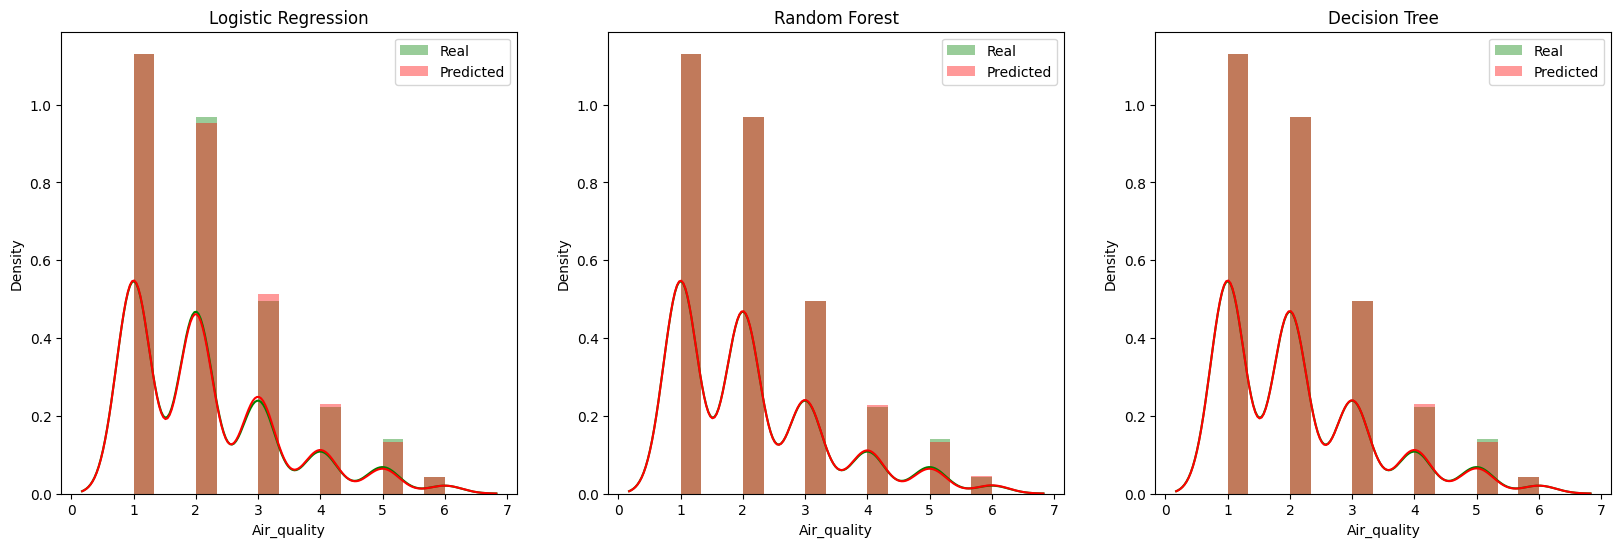

In [168]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(logistic_predictions, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(random_forest_predictions, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(decision_tree_predictions, label='Predicted', ax=ax[2], color = 'red')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('Decision Tree')

ax[0].legend()
ax[1].legend()
ax[2].legend()